#### Question Q-1

In [104]:
import numpy as np

# Load data:
array = np.loadtxt('Motorcycledata.txt')
# print(array.shape)
t = array[:,1]
Y = array[:,2]

# Generate the vectors t_i, Y_i
t_i, m = np.unique(t, return_counts=True)
Y_i = np.unique(Y)

# Calculate the valeurs agrégées
Y_agre = np.zeros(m.shape[0])
index = 0
for i in range(0, m.size):
    sum = 0
    for j in range(0, m[i]):
        sum = sum+Y[index]
#         print(Y[index])
        index = index+1
    Y_agre[i] = sum/m[i]
#     print Y_agre[i]
#     print(m[i])

(94,)


#### Question Q-2

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

np.polyfit(t_i,Y_agre,3)

array([ -7.15267685e-03,   6.76952385e-01,  -1.71268509e+01,
         7.50606578e+01])

(94, 1)


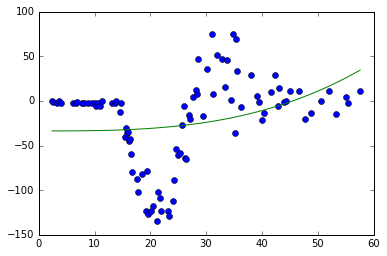

In [94]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# For each t_i, polynome=3 is adopted
poly = PolynomialFeatures(3)

# Reshape the array(94,) to array(94,1)
t_i = t_i.reshape(t_i.shape[0],1)
t_poly = poly.fit_transform(t_i)[:,3].reshape(t_i.shape[0],1)
Y_agre = Y_agre.reshape(Y_agre.shape[0],1)

# Linear regression: moindre carrés
lr = LinearRegression()
lr.fit(t_poly, Y_agre)
# lr.intercept_, lr.coef_

print((lr.predict(t_poly)).shape)
# print(t_i)

# Display
plt.figure()
plt.plot(t_i, Y_agre, 'o')
plt.plot(t_i, lr.predict(t_poly))
plt.show()